<a href="https://colab.research.google.com/github/dannnshe/14-Deep-Learning/blob/main/14_Deep_Learning_LSTM_Stock_Predictor_Using_Closing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving btc_sentiment.csv to btc_sentiment.csv


In [8]:
df = pd.read_csv('btc_sentiment.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
df = df.drop(columns="fng_classification")
df.head()

,fng_value
date,
2019-07-29,19
2019-07-28,16
2019-07-27,47
2019-07-26,24
2019-07-25,42


In [10]:
from google.colab import files
uploaded = files.upload()

Saving btc_historic.csv to btc_historic.csv


In [11]:
df2 = pd.read_csv('btc_historic.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)['Close']
df2 = df2.sort_index()
df2.tail()

Date
2019-07-25    9882.429688
2019-07-26    9847.450195
2019-07-27    9478.320313
2019-07-28    9531.769531
2019-07-29    9529.889648
Name: Close, dtype: float64

In [12]:
df = df.join(df2, how="inner")
df.tail()

,fng_value,Close
2019-07-25,42,9882.429688
2019-07-26,24,9847.450195
2019-07-27,47,9478.320313
2019-07-28,16,9531.769531
2019-07-29,19,9529.889648


In [13]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [14]:
window_size = 10

feature_column = 1
target_column = 1
X, y = window_data(df, window_size, feature_column, target_column)

In [15]:
split = int(0.7 * len(X))

X_train= X[:split]
X_test= X[split:]

y_train= y[:split]
y_test= y[split:]

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scaler.fit(X)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

scaler.fit(y)
y_train=scaler.transform(y_train)
y_test=scaler.transform(y_test)

In [17]:
X_train= X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test= X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.60761794]
  [0.58242373]
  [0.62172321]
  [0.51499412]
  [0.38267307]
  [0.46160996]
  [0.4503991 ]
  [0.5193988 ]
  [0.56445096]
  [0.55127638]]

 [[0.58242373]
  [0.62172321]
  [0.51499412]
  [0.38267307]
  [0.46160996]
  [0.4503991 ]
  [0.5193988 ]
  [0.56445096]
  [0.55127638]
  [0.5012101 ]]

 [[0.62172321]
  [0.51499412]
  [0.38267307]
  [0.46160996]
  [0.4503991 ]
  [0.5193988 ]
  [0.56445096]
  [0.55127638]
  [0.5012101 ]
  [0.58660203]]] 

X_test sample values:
[[[0.04675556]
  [0.03913222]
  [0.03975922]
  [0.03856719]
  [0.03679562]
  [0.03728835]
  [0.03974167]
  [0.04528668]
  [0.04528668]
  [0.07024855]]

 [[0.03913222]
  [0.03975922]
  [0.03856719]
  [0.03679562]
  [0.03728835]
  [0.03974167]
  [0.04528668]
  [0.04528668]
  [0.07024855]
  [0.07145402]]

 [[0.03975922]
  [0.03856719]
  [0.03679562]
  [0.03728835]
  [0.03974167]
  [0.04528668]
  [0.04528668]
  [0.07024855]
  [0.07145402]
  [0.07659928]]]


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [19]:
model = Sequential()

number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer

model.add(Dense(1))

In [20]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 30)            3840      
_________________________________________________________________
dropout (Dropout)            (None, 10, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 30)            7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [24]:
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=30, verbose=1)

Epoch 1/10
13/13 [==============================] - 0s 16ms/step - loss: 0.0062
Epoch 2/10
13/13 [==============================] - 0s 14ms/step - loss: 0.0059
Epoch 3/10
13/13 [==============================] - 0s 15ms/step - loss: 0.0060
Epoch 4/10
13/13 [==============================] - 0s 15ms/step - loss: 0.0063
Epoch 5/10
13/13 [==============================] - 0s 15ms/step - loss: 0.0057
Epoch 6/10
13/13 [==============================] - 0s 14ms/step - loss: 0.0058
Epoch 7/10
13/13 [==============================] - 0s 15ms/step - loss: 0.0060
Epoch 8/10
13/13 [==============================] - 0s 15ms/step - loss: 0.0061
Epoch 9/10
13/13 [==============================] - 0s 15ms/step - loss: 0.0055
Epoch 10/10
13/13 [==============================] - 0s 15ms/step - loss: 0.0056


In [25]:
model.evaluate(X_test, y_test, verbose=0)

0.008541310206055641

In [26]:
predicted=model.predict(X_test)

In [27]:
predicted_prices= scaler.inverse_transform(predicted)
real_prices= scaler.inverse_transform(y_test.reshape(-1,1))

In [28]:
df = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 

df.head()

,Actual,Predicted
2019-02-20,3924.239990,3596.819824
2019-02-21,3974.050049,3605.617920
2019-02-22,3937.040039,3630.453369
2019-02-23,3983.530029,3661.718750
2019-02-24,4149.089844,3699.655518


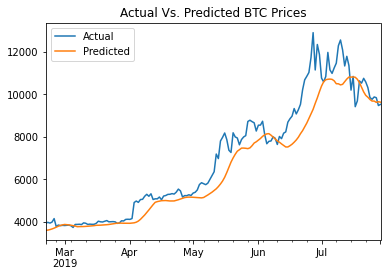

In [29]:
df.plot(title="Actual Vs. Predicted BTC Prices")